# Performance Evaluation "Macro"benchmarks

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 100)

In [2]:
data = pd.read_csv('maxisign/measurement_maxisign.tsv', delimiter='\t')
data = data.append(pd.read_csv('password_check/measurement_password_check.tsv', delimiter='\t'))
data.drop(columns='Unnamed: 0', inplace=True)
data.sort_values(['program', 'operation', 'enclaved'], inplace=True)

data

,cmd,descr,duration,enclaved,operation,program,size,time
0,"['cargo', 'build', '--features=enclavization_b...",Time spent building the program in debug mode ...,19822.845697,False,debug,build maxisign,NaN,2021-08-21 13:28:42.697509
1,"['cargo', 'rustc', '--features=enclavization_b...",Time spent building the program in debug mode ...,22406.599522,False,"debug, codegen-units=1",build maxisign,NaN,2021-08-21 13:29:05.113325
4,"['make', 'all']",Time spent building the program in debug mode,63318.029165,True,"debug, codegen-units=1",build maxisign,NaN,2021-08-21 13:32:13.308274
2,"['cargo', 'build', '--features=enclavization_b...",Time spent building the program in release mod...,56082.185268,False,release,build maxisign,NaN,2021-08-21 13:30:01.204096
3,"['cargo', 'rustc', '--features=enclavization_b...",Time spent building the program in release mod...,68725.020885,False,"release, codegen-units=1",build maxisign,NaN,2021-08-21 13:31:09.935880
...,...,...,...,...,...,...,...,...
85,['build/password_check'],Time from after program startup to having logg...,76.155000,True,login,password_check,100.0,2021-08-21 13:25:41.557382
93,['build/password_check'],Time from after program startup to having logg...,75.976000,True,login,password_check,1.0,2021-08-21 13:25:52.329409
95,['build/password_check'],Time from after program startup to having logg...,76.123000,True,login,password_check,100.0,2021-08-21 13:26:15.853430
103,['build/password_check'],Time from after program startup to having logg...,75.981000,True,login,password_check,1.0,2021-08-21 13:26:26.629404


## Build Performance

In [3]:
results = data[data['program'].str.contains('build')].copy()
results['duration'] = results['duration'].div(1000)
results

,cmd,descr,duration,enclaved,operation,program,size,time
0,"['cargo', 'build', '--features=enclavization_b...",Time spent building the program in debug mode ...,19.822846,False,debug,build maxisign,NaN,2021-08-21 13:28:42.697509
1,"['cargo', 'rustc', '--features=enclavization_b...",Time spent building the program in debug mode ...,22.406600,False,"debug, codegen-units=1",build maxisign,NaN,2021-08-21 13:29:05.113325
4,"['make', 'all']",Time spent building the program in debug mode,63.318029,True,"debug, codegen-units=1",build maxisign,NaN,2021-08-21 13:32:13.308274
2,"['cargo', 'build', '--features=enclavization_b...",Time spent building the program in release mod...,56.082185,False,release,build maxisign,NaN,2021-08-21 13:30:01.204096
3,"['cargo', 'rustc', '--features=enclavization_b...",Time spent building the program in release mod...,68.725021,False,"release, codegen-units=1",build maxisign,NaN,2021-08-21 13:31:09.935880
5,"['make', 'all']",Time spent building the program in release mode,191.629407,True,"release, codegen-units=1",build maxisign,NaN,2021-08-21 13:35:24.995238
0,"['cargo', 'build', '--features=enclavization_b...",Time spent building the program in debug mode ...,36.477087,False,debug,build password_check,NaN,2021-08-21 13:07:00.184689
1,"['cargo', 'rustc', '--features=enclavization_b...",Time spent building the program in debug mode ...,41.118047,False,"debug, codegen-units=1",build password_check,NaN,2021-08-21 13:07:41.320885
4,"['make', 'all']",Time spent building the program in debug mode,95.707413,True,"debug, codegen-units=1",build password_check,NaN,2021-08-21 13:14:48.417006
2,"['cargo', 'build', '--features=enclavization_b...",Time spent building the program in release mod...,150.329492,False,release,build password_check,NaN,2021-08-21 13:10:11.667629


In [4]:
indexed_results = results.set_index(['operation', 'enclaved', 'program'])
indexed_results = indexed_results.unstack()
indexed_results

cmd  \
program                                                               build maxisign   
operation                enclaved                                                      
debug                    False     ['cargo', 'build', '--features=enclavization_b...   
debug, codegen-units=1   False     ['cargo', 'rustc', '--features=enclavization_b...   
                         True                                        ['make', 'all']   
release                  False     ['cargo', 'build', '--features=enclavization_b...   
release, codegen-units=1 False     ['cargo', 'rustc', '--features=enclavization_b...   
                         True                                        ['make', 'all']   

                                                                                      \
program                                                         build password_check   
operation                enclaved                                                      
debug                    False     ['cargo', 'build', '--features=enclavization_b...   
debug, codegen-units=1   False     ['cargo', 'rustc', '--features=enclavization_b...   
                         True                                        ['make', 'all']   
release                  False     ['cargo', 'build', '--features=enclavization_b...   
release, codegen-units=1 False     ['cargo', 'rustc', '--features=enclavization_b...   
                         True                                        ['make', 'all']   

                                                                               descr  \
program                                                               build maxisign   
operation                enclaved                                                      
debug                    False     Time spent building the program in debug mode ...   
debug, codegen-units=1   False     Time spent building the program in debug mode ...   
                         True          Time spent building the program in debug mode   
release                  False     Time spent building the program in release mod...   
release, codegen-units=1 False     Time spent building the program in release mod...   
                         True        Time spent building the program in release mode   

                                                                                      \
program                                                         build password_check   
operation                enclaved                                                      
debug                    False     Time spent building the program in debug mode ...   
debug, codegen-units=1   False     Time spent building the program in debug mode ...   
                         True          Time spent building the program in debug mode   
release                  False     Time spent building the program in release mod...   
release, codegen-units=1 False     Time spent building the program in release mod...   
                         True        Time spent building the program in release mode   

                                        duration                       \
program                           build maxisign build password_check   
operation                enclaved                                       
debug                    False         19.822846            36.477087   
debug, codegen-units=1   False         22.406600            41.118047   
                         True          63.318029            95.707413   
release                  False         56.082185           150.329492   
release, codegen-units=1 False         68.725021           180.977275   
                         True         191.629407           378.840527   

                                            size                       \
program                           build maxisign build password_check   
operation                enclaved                                       
debug                    False  

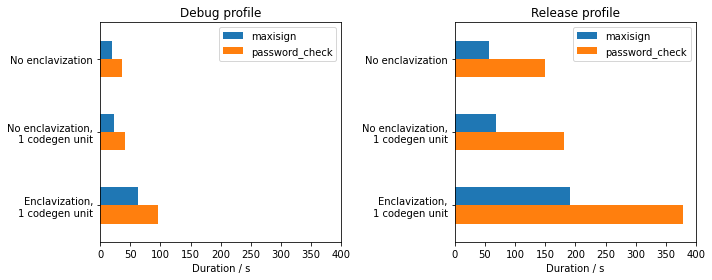

In [5]:
indexed_results_1 = indexed_results[indexed_results.index.get_level_values(0).str.contains('debug')]
indexed_results_2 = indexed_results[indexed_results.index.get_level_values(0).str.contains('release')]

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
indexed_results_1['duration'].plot(kind='barh', ax=ax[0])
indexed_results_2['duration'].plot(kind='barh', ax=ax[1])

for i in range(2):
    ax[i].set_xlabel('Duration / s')
    ax[i].set_xlim(0, 400)
    ax[i].invert_yaxis()
    ax[i].set_yticklabels(['No enclavization', 'No enclavization,\n1 codegen unit', 'Enclavization,\n1 codegen unit'])
    ax[i].yaxis.get_label().set_visible(False)
    ax[i].legend(['maxisign', 'password_check'], loc='upper right')

ax[0].set_title('Debug profile')
ax[1].set_title('Release profile')

fig.tight_layout()

In [6]:
fig.savefig('performance_build_macro.pdf', bbox_inches='tight', pad_inches=0)

## maxisign Runtime Performance

In [7]:
mb_data = data[data['program'] == 'maxisign'].copy()
mb_data['size'] = mb_data['size'] / 1024
results = mb_data.fillna(1).groupby(['operation', 'enclaved', 'size']).mean()
results

duration
operation enclaved size             
genkey    False    1.0        0.0997
          True     1.0        0.7468
sign      False    1.0        0.0840
                   100.0      0.6694
                   512.0      2.9111
                   1024.0     5.7492
                   4096.0    22.9825
                   8192.0    45.9174
                   12288.0   68.9371
          True     1.0        0.7172
                   100.0      1.5160
                   512.0      4.2213
                   1024.0     7.5555
                   4096.0    27.7023
                   8192.0    54.5106
                   12288.0   81.5183
verify    False    1.0        0.1099
                   100.0      0.4732
                   512.0      1.9963
                   1024.0     3.6409
                   4096.0    14.4155
                   8192.0    28.6844
                   12288.0   43.0361
          True     1.0        0.1364
                   100.0      0.6304
                   512.0      2.0857
                   1024.0     3.8687
                   4096.0    14.6082
                   8192.0    28.9661
                   12288.0   43.2619

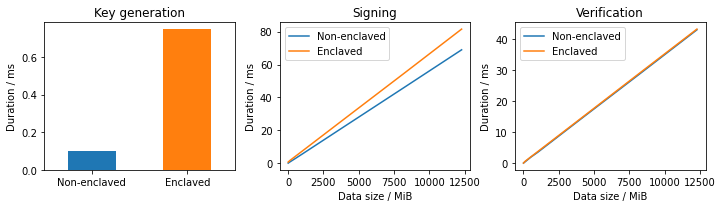

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

res = results[results.index.isin(['genkey'], level=0)]
res['duration'].plot(kind='bar', ax=ax[0], color=['#1f77b4', '#ff7f0e'])
ax[0].set_xticklabels(['Non-enclaved', 'Enclaved'], rotation=0)
ax[0].xaxis.get_label().set_visible(False)

unstacked_results = results.unstack()
for i, op in enumerate(['sign', 'verify'], start=1):
    res = unstacked_results[unstacked_results.index.isin([op], level=0)]
    res['duration'].T.plot(kind='line', ax=ax[i])

for i in range(3):
    ax[i].set_ylabel('Duration / ms')
    
for i in range(1, 3):
    ax[i].ticklabel_format(style='plain')
    ax[i].set_xlabel('Data size / MiB')
    ax[i].legend(['Non-enclaved', 'Enclaved'], loc='upper left')

ax[0].set_title('Key generation')
ax[1].set_title('Signing')
ax[2].set_title('Verification')

fig.tight_layout()

In [9]:
fig.savefig('performance_run_maxisign.pdf', bbox_inches='tight', pad_inches=0)

## password_check Runtime Performance

In [10]:
results = data[data['program'] == 'password_check'].fillna(1).groupby(['operation', 'size', 'enclaved']).mean()
results

duration
operation  size  enclaved          
add        1.0   False      49.1169
                 True       75.9491
           100.0 False      48.9425
                 True       76.1849
initialize 1.0   False      50.1403
                 True       76.4968
login      1.0   False      49.7211
                 True       75.9719
           100.0 False      49.4665
                 True       76.0983

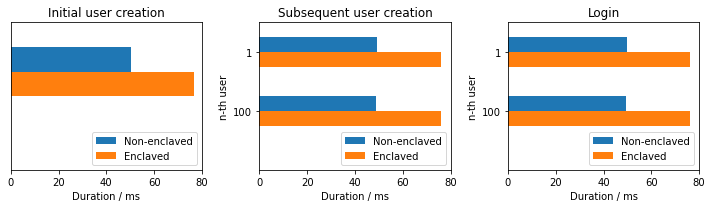

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

for i, op in enumerate(['initialize', 'add', 'login']):
    res = results[results.index.isin([op], level=0)]
    # Make non-enclaved appear before enclaved and 1 before 100
    unstacked = res['duration'].unstack().sort_index(axis='columns', ascending=False).sort_values(['size'], ascending=False)
    # Swap first two default colors
    unstacked.plot(kind='barh', ax=ax[i], color=['#ff7f0e', '#1f77b4'])

for i in range(3):
    ax[i].set_xlabel('Duration / ms')
    ax[i].set_xlim(0, 80)
    # Swap legend order
    handles, _ = ax[i].get_legend_handles_labels()
    ax[i].legend(handles[::-1], ['Non-enclaved', 'Enclaved'], loc='lower right')

ax[0].get_yaxis().set_visible(False)
ax[0].set_ylim(-1, 0.5)
for i in range(1, 3):
    ax[i].set_ylim(-1, 1.5)
    ax[i].set_yticklabels([100, 1])
    ax[i].set_ylabel('n-th user')

ax[0].set_title('Initial user creation')
ax[1].set_title('Subsequent user creation')
ax[2].set_title('Login')

fig.tight_layout()

In [12]:
fig.savefig('performance_run_password_check.pdf', bbox_inches='tight', pad_inches=0)